In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

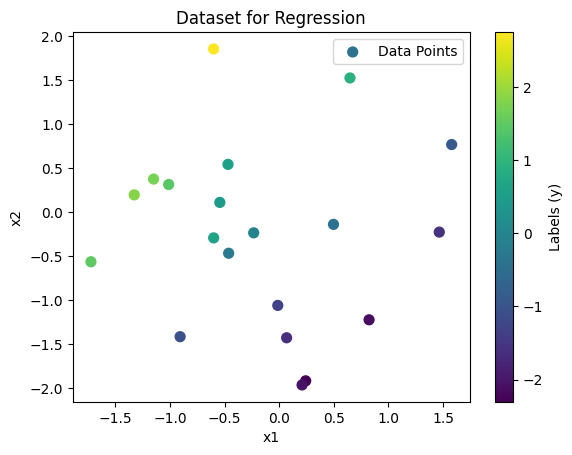

In [11]:
# Enforce reproducibility
np.random.seed(42)

# Parameters
theta_true = np.array([-1, 1])
sigma_y = 0.1  # Noise variance
prior_mean = np.zeros(2)
prior_cov = np.eye(2)
n_samples = 20

# Generate data
x = np.random.multivariate_normal(np.zeros(2), np.eye(2), n_samples)
y = x @ theta_true + np.random.normal(0, np.sqrt(sigma_y), n_samples)

# Plot data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', s=50, label='Data Points')
plt.colorbar(label='Labels (y)')
plt.title('Dataset for Regression')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

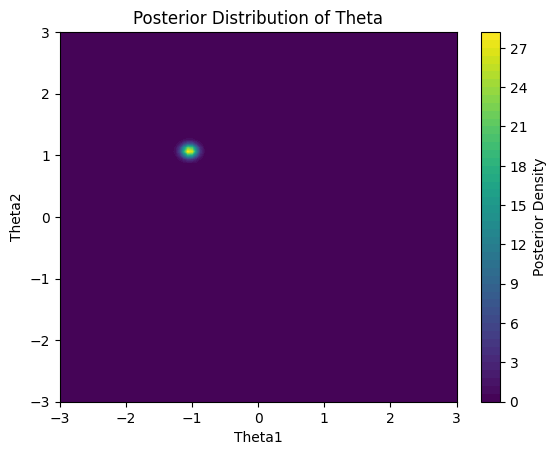

In [12]:
posterior_cov = np.linalg.inv(np.linalg.inv(prior_cov) + (1 / sigma_y) * (x.T @ x))
posterior_mean = posterior_cov @ (x.T @ y) * (1 / sigma_y)

# Grid for plotting posterior in range [-3, 3]^2
theta_range = np.linspace(-3, 3, 100)
theta_grid = np.array(np.meshgrid(theta_range, theta_range)).reshape(2, -1).T

posterior_pdf = multivariate_normal(mean=posterior_mean, cov=posterior_cov).pdf(theta_grid)
posterior_pdf = posterior_pdf.reshape(100, 100)

# Plot posterior
plt.contourf(theta_range, theta_range, posterior_pdf, levels=50, cmap='viridis')
plt.colorbar(label='Posterior Density')
plt.title('Posterior Distribution of Theta')
plt.xlabel('Theta1')
plt.ylabel('Theta2')
plt.show()


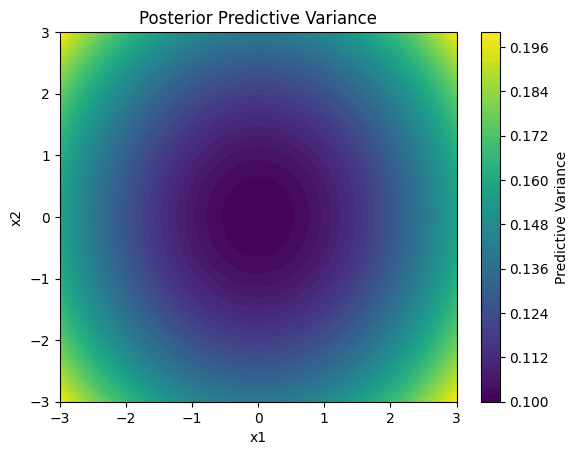

In [7]:
# Grid for x in range [-3, 3]^2
x_grid = np.linspace(-3, 3, 50)
x_test = np.array(np.meshgrid(x_grid, x_grid)).reshape(2, -1).T

predictive_mean = x_test @ posterior_mean
predictive_variance = np.sum((x_test @ posterior_cov) * x_test, axis=1) + sigma_y

# Plot predictive variance
plt.contourf(x_grid, x_grid, predictive_variance.reshape(50, 50), levels=50, cmap='viridis')
plt.colorbar(label='Predictive Variance')
plt.title('Posterior Predictive Variance')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

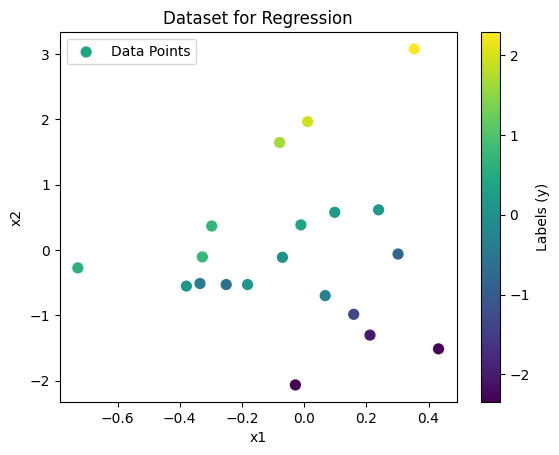

In [25]:
sigma_x = np.array([[0.1, 0], [0, 1]])
x_new = np.random.multivariate_normal(np.zeros(2), sigma_x, n_samples)
y_new = x_new @ theta_true + np.random.normal(0, np.sqrt(sigma_y), n_samples)

# Plot data
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_new, cmap='viridis', s=50, label='Data Points')
plt.colorbar(label='Labels (y)')
plt.title('Dataset for Regression')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

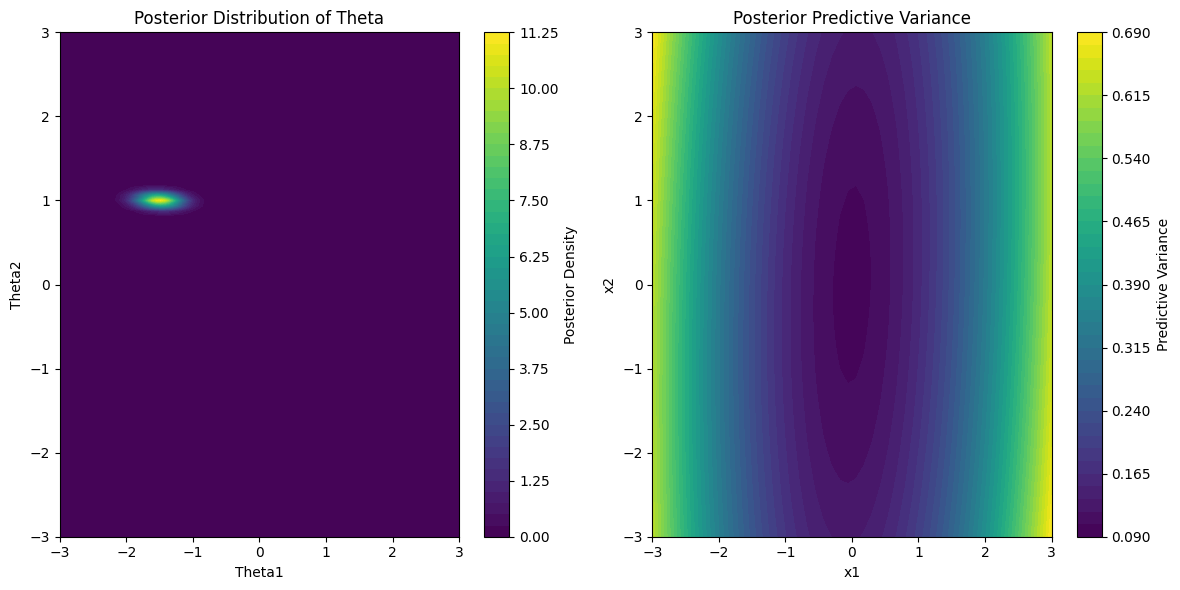

In [26]:
xT_x_new = x_new.T @ x_new
posterior_cov_new = np.linalg.inv(np.linalg.inv(prior_cov) + (1 / sigma_y) * xT_x_new)
posterior_mean_new = posterior_cov_new @ (x_new.T @ y_new) * (1 / sigma_y)

# Compute density of posterior
posterior_pdf_new = multivariate_normal(mean=posterior_mean_new, cov=posterior_cov_new).pdf(theta_grid)
posterior_pdf_new = posterior_pdf_new.reshape(100, 100)

predictive_variance_new = np.sum((x_test @ posterior_cov_new) * x_test, axis=1) + sigma_y

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot predictive variance
ax1 = axes[0]
contour1 = ax1.contourf(theta_range, theta_range, posterior_pdf_new, levels=50, cmap='viridis')
fig.colorbar(contour1, ax=ax1, label='Posterior Density')
ax1.set_title('Posterior Distribution of Theta')
ax1.set_xlabel('Theta1')
ax1.set_ylabel('Theta2')


# Plot new predictive variance
ax2 = axes[1]
contour2 = ax2.contourf(x_grid, x_grid, predictive_variance_new.reshape(50, 50), levels=50, cmap='viridis')
fig.colorbar(contour2, ax=ax2, label='Predictive Variance')
ax2.set_title('Posterior Predictive Variance')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()